In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils 
import easyocr 

In [2]:
img1=cv2.imread('C://Users//soura//Desktop/car.jpg')

In [3]:
color=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY) 

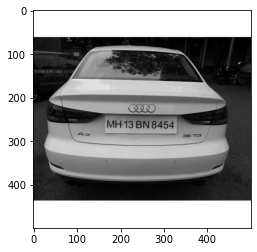

In [4]:
plt.imshow(cv2.cvtColor(color,cv2.COLOR_BGR2RGB))

In [5]:
FILTER=cv2.bilateralFilter(color,11,18,20) 

In [6]:
e=cv2.Canny(FILTER,30,200) 

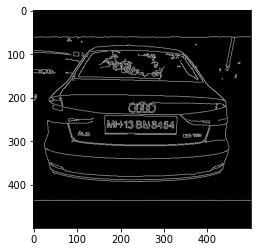

In [7]:
plt.imshow(cv2.cvtColor(e,cv2.COLOR_BGR2RGB))

In [8]:
k=cv2.findContours(e.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 

In [9]:
c=imutils.grab_contours(k)

In [10]:
c=sorted(c,key=cv2.contourArea,reverse=True)[:10]

In [11]:
location=None                                
for contour in c:
    approx=cv2.approxPolyDP(contour,10,True) 
    if len(approx)==4:                       
        location=approx
        break

In [12]:
location

array([[[164, 243]],

       [[164, 284]],

       [[329, 282]],

       [[326, 243]]], dtype=int32)

In [13]:
mask=np.zeros(color.shape,np.uint8) 

In [14]:
image=cv2.drawContours(mask,[location],0,255,-1)

In [15]:
image=cv2.bitwise_and(img1,img1,mask=mask) 

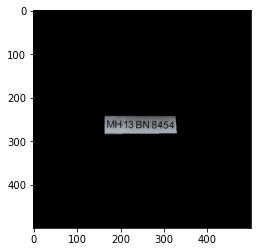

In [16]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [17]:
(x,y)=np.where(mask==255)

In [18]:
(x1,y1)=(np.min(x),np.min(y))

In [19]:
(x2,y2)=(np.max(x),np.max(y))

In [20]:
image1=color[x1:x2+1,y1:y2+1]

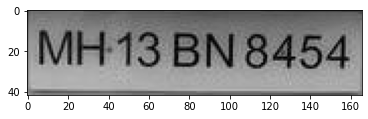

In [21]:
plt.imshow(cv2.cvtColor(image1,cv2.COLOR_BGR2RGB))

In [22]:
r=easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [23]:
output=r.readtext(image1)

C:\Users\soura\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [24]:
output

[([[2, 6], [162, 6], [162, 34], [2, 34]], 'MH13 BN8454', 0.9576936753640796)]

In [25]:
text=output[0][-2] 

In [26]:
font=cv2.FONT_HERSHEY_SIMPLEX

In [27]:
final_result=cv2.putText(img1,text=text,org=(approx[0][0][0],approx[1][0][1]+60),fontFace=font,fontScale=1,color=(0,255,0),thickness=2,lineType=cv2.LINE_AA)


In [28]:
final_result=cv2.rectangle(img1,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3) 

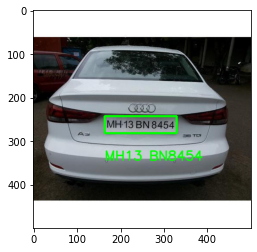

In [29]:
plt.imshow(cv2.cvtColor(final_result,cv2.COLOR_BGR2RGB))

In [30]:
text

'MH13 BN8454'